In [69]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.info() # 가장 많이 보는게 Dtype ! / TotalCharges int가 아닌 object 로 나옴! 이상해.
# 이상한 놈 찾아보기.
df['TotalCharges'].unique()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # 데이터를 숫자형(int, float) 으로 바꿔주는 함수 / 보통 문자열이 섞인 숫자열을 진짜 숫자로 바꿀 때 많이 써
# errors='coerce' -> 숫자로 변환할 수 없는 값은 → NaN(결측치) 으로 바꿔줌
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df['TotalCharges'].isna().sum() # 결측치 확인 후 그 결측치가 몇개인지 총 합

np.int64(11)

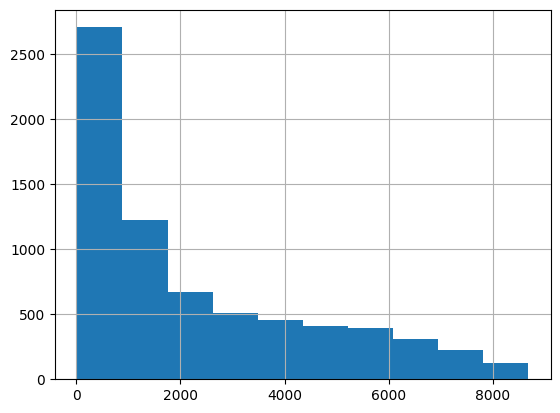

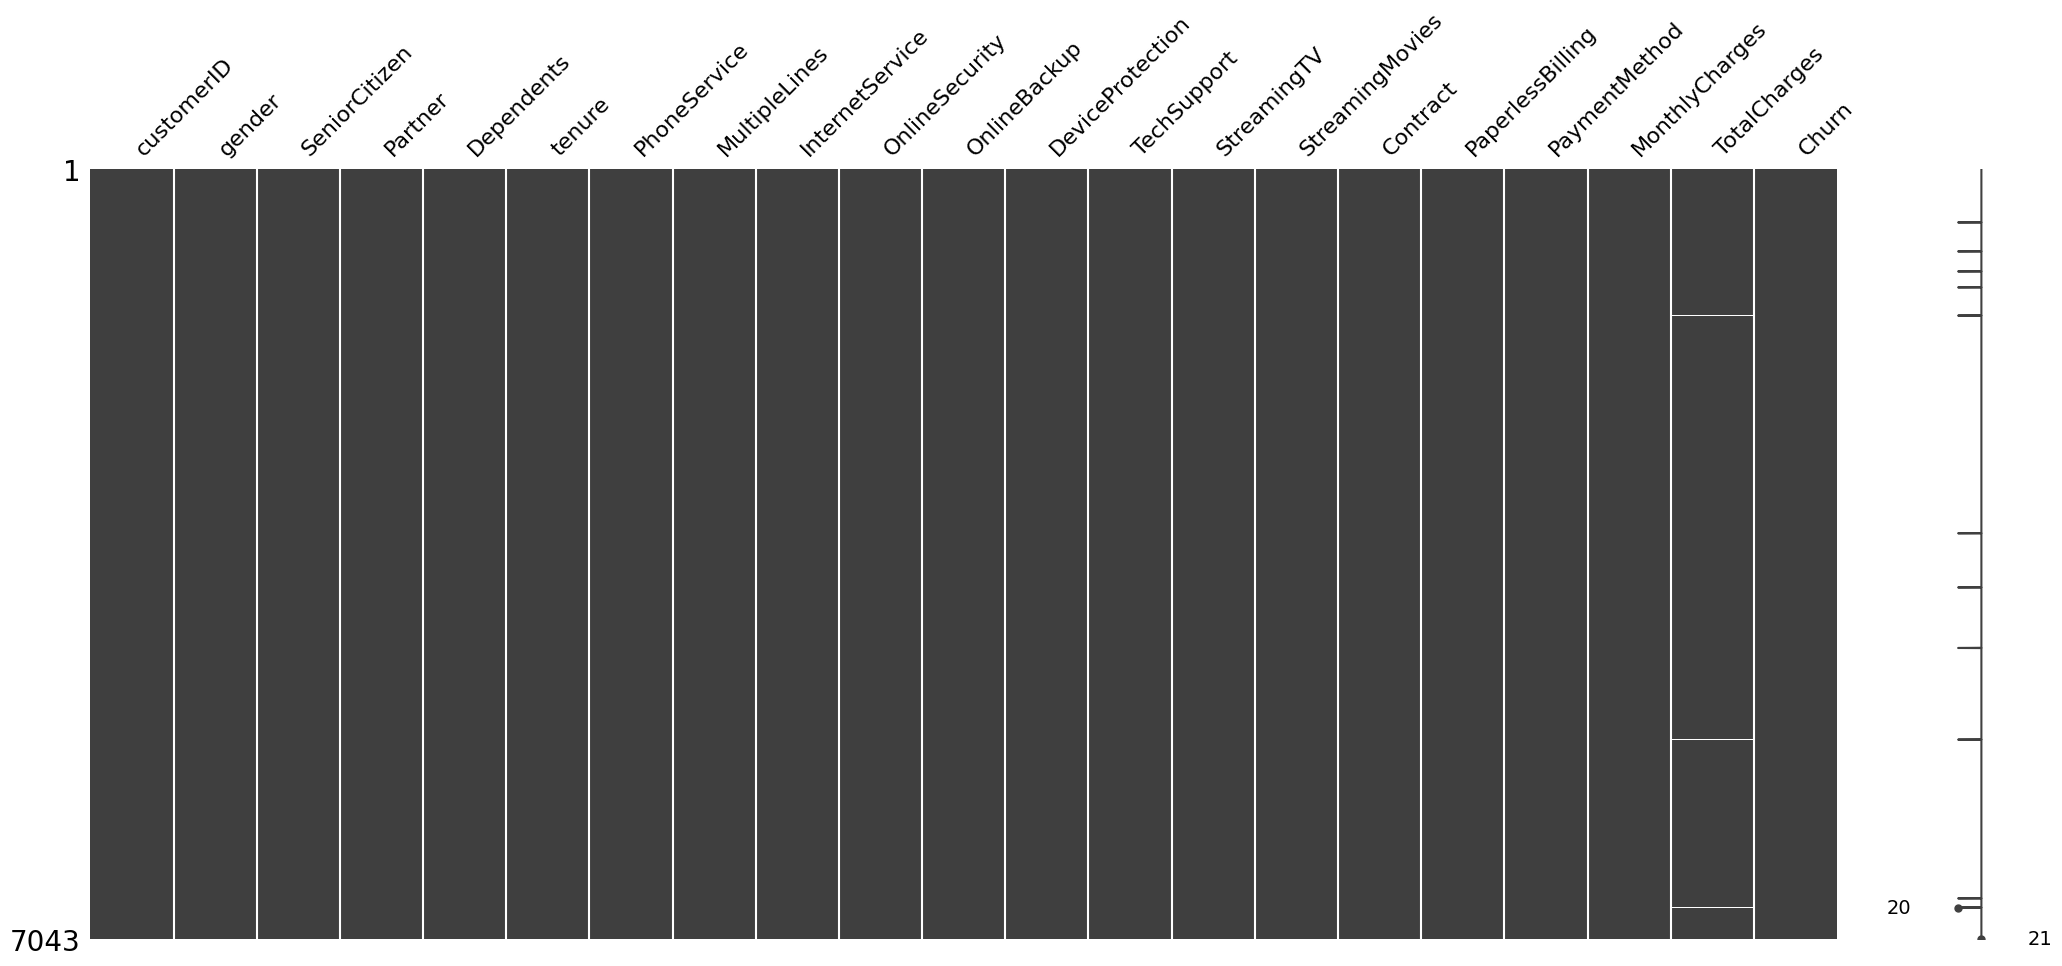

In [72]:
# 결측치 시각화
import missingno as msno
import matplotlib.pyplot as plt

df['TotalCharges'].hist()
msno.matrix(df)
plt.show()

In [73]:
df.isna().mean() # TotalCharges  결측치 비율(평균)은  0.001562  -- > 해당 결측치 row 데터를 삭제해봐

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [74]:
# 결측치 비율은  0.001562  -- > 해당 결측치 row 데터를 삭제해봐 / 데이터를 클리닝하는 작업들 하고 있음
# df.dropna()  <- 이렇게 하면 다 날라감... 그래서 parameter를 잘 봐야함
df = df.dropna(subset = ['TotalCharges'])
print(len(df))




7032


In [75]:
# map처럼 알려면 범주값을 알아야함
df['Churn'].unique() # .unique() 중복을 없애고 어떤 값들이 들어있는지 확인할 때 사용

array(['No', 'Yes'], dtype=object)

In [76]:
# 이탈여부 churn  -- >  yes , no   1  0  으로 변경  /  분석하기 용이 (ex > true / false or  남/여)
df['Churn'].map( { 'No': 0 , 'Yes': 1 } )
df['Churn']





0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

C:\Users\playdata\AppData\Local\Temp\ipykernel_19932\3677311698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= 'Churn' , ax = ax[0] , palette=['red','blue'])


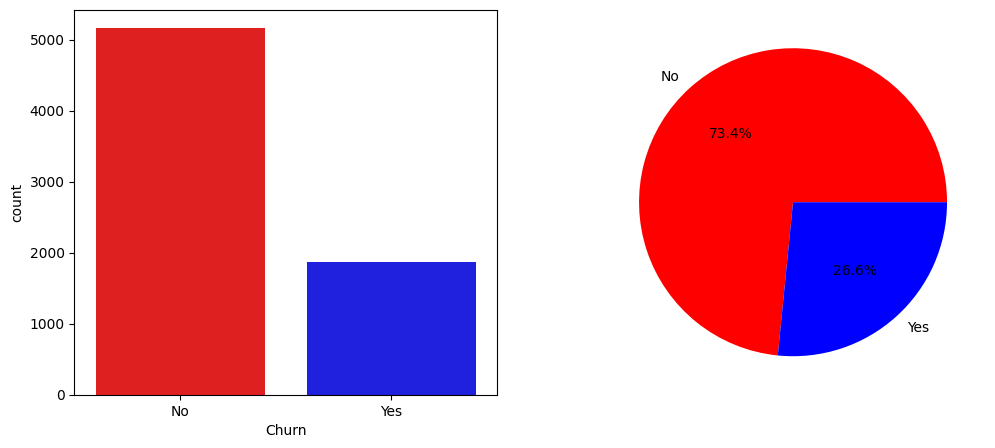

<function matplotlib.pyplot.pie(x: 'ArrayLike', *, explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'>

In [77]:
# 이탈 고객의 현황

# 계약종류 , 가입기간

import matplotlib.pyplot as plt
import seaborn as sns
f , ax = plt.subplots(1,2,figsize=(12,5))
df['Churn'].unique()
# countplot  을 이용해봐.
sns.countplot(data=df, x= 'Churn' , ax = ax[0] , palette=['red','blue'])
# 화면 분할 해보자.
df['Churn'].value_counts()
ax[1].pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', colors=['red','blue'])
plt.show()
plt.pie


<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

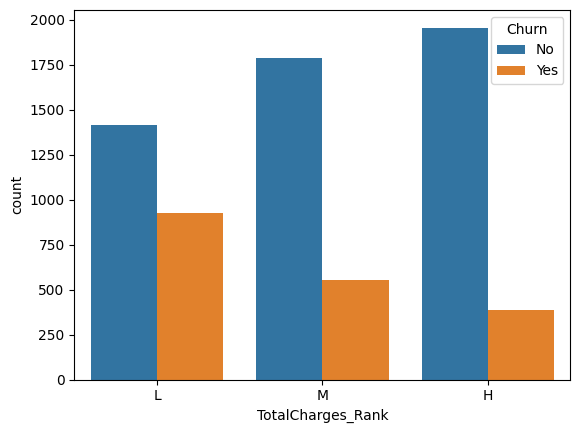

In [82]:
# 타킷이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계

df.head()

# 비용에 따른 가입 유지 여부 확인
# TotalCharges 3등분해서 (H , M , L) -> 새로운 컬럼에 추가
df['TotalCharges_Rank'] = pd.qcut(df['TotalCharges'], q=3 , labels=['L', 'M', 'H'] ) # qcut은 데이터를 동일한 개수로 분할하므로, 낮은 값부터 높은 값 순서로 레이블을 지정하는 것이 일반적임.
df.tail()
# 새로운 컬럼별 가입여부에 대한 groupby 를 해서 시각화까지
sns.countplot(data=df, x='TotalCharges_Rank',hue='Churn')

In [ ]:
# 계약 종류(Contract)에 따른 고객 분포
# 가입 기간(tenure) 분포
# 계약 종류에 따른 이탈률
# 가입 기간에 따른 이탈률
# 월 요금에 따른 이탈률
# 상관관계 분석 (Correlation Analysis)